In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib


In [2]:
df=pd.read_csv('carprice.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [4]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [5]:
df.shape

(892, 6)

In [6]:
#df['Price'].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
df['fuel_type'].unique()



array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [8]:
df['fuel_type'].mode()

0    Petrol
Name: fuel_type, dtype: object

In [9]:
##df['fuel_type']=df['fuel_type'].fillna(df['fuel_type'].mode())

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(837, 6)

<bound method Series.unique of 0        Hyundai Santro Xing XO eRLX Euro III
1                     Mahindra Jeep CL550 MDI
2                  Maruti Suzuki Alto 800 Vxi
3      Hyundai Grand i10 Magna 1.2 Kappa VTVT
4            Ford EcoSport Titanium 1.5L TDCi
                        ...                  
883                Maruti Suzuki Ritz VXI ABS
885                 Tata Indica V2 DLE BS III
886                      Toyota Corolla Altis
888                       Tata Zest XM Diesel
889                        Mahindra Quanto C8
Name: name, Length: 837, dtype: object>

In [12]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [13]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '2003', '2004', '1995', '2002', '2001'], dtype=object)

In [14]:
df1=df.copy()

In [15]:
df1['year']=df1['year'].astype(int)

In [16]:
df1.dtypes

name          object
company       object
year           int32
Price         object
kms_driven    object
fuel_type     object
dtype: object

In [17]:
def is_int(x):
    try:
       int(x.replace(',',''))
    except:
        return False
    return True

df2=df1[df1['Price'].apply(is_int)]

In [18]:
def convert_Price_to_num(x):
   return        int(x.replace(',',''))

df2.Price= df2.Price.apply(convert_Price_to_num)

C:\Users\varkumar\AppData\Local\Temp\ipykernel_22204\907343579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.Price= df2.Price.apply(convert_Price_to_num)


In [19]:
df2.dtypes

name          object
company       object
year           int32
Price          int64
kms_driven    object
fuel_type     object
dtype: object

In [20]:
df2.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel
6,Ford Figo,Ford,2012,175000,"41,000 kms",Diesel


In [21]:
def convert_kms_to_num(x):
    tokens = x.split(' ')
    if len(tokens) == 2:
        try:
            return int(tokens[0].replace(',',''))
        except:
           return None  
    return None
df3 = df2.copy()
df3.kms_driven = df3.kms_driven.apply(convert_kms_to_num)
df3 = df3[df3.kms_driven.notnull()]

In [22]:
df3.shape

(816, 6)

In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int32(1), int64(2), object(3)
memory usage: 41.4+ KB


In [24]:
#df3['name']=df3['name'].str.split(' ').str.slice(0,3).str.join(' ')
def name_reduce_len(x):
    tokens = x.split(' ')
    tokens=tokens[0:3]
    tokens=' '.join(tokens)
    return tokens
 
df4 = df3.copy()
df4.name = df4.name.apply(name_reduce_len)
#df4 = df4[df4.name.notnull()]
# retr=name_reduce_len('Hyundai Santro Xing XO eRLX Euro III')
# retr[0:3]

In [25]:
df4.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [26]:
df4['name'].shape

(816,)

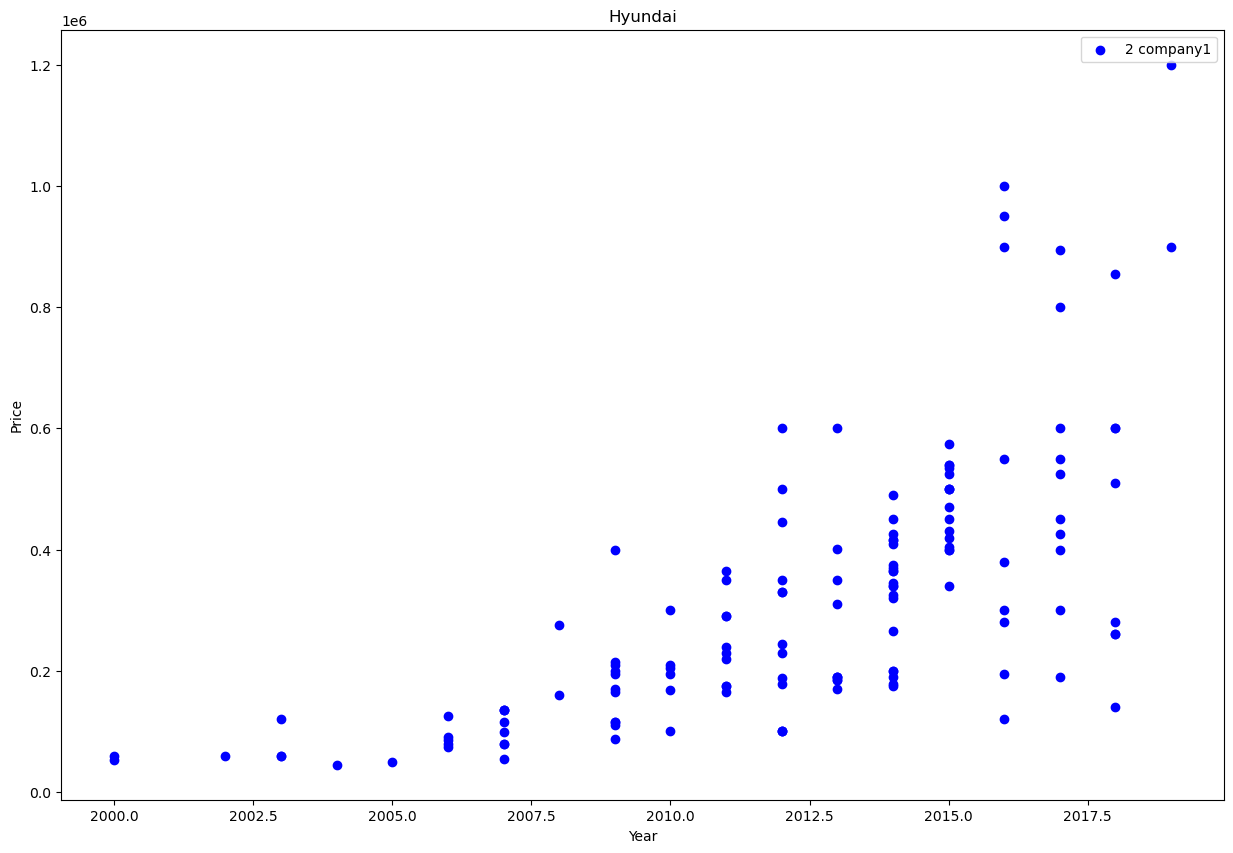

In [27]:
# df3.reset_index(drop=True)

def plot_scatter_chart(df,company):
    company1 = df[(df.company==company)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(company1.year,company1.Price,color='blue',label='2 company1')
    # plt.scatter(company1.total_sqft,company13.price,marker='+', color='green',label='3 company1', s=50)
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.title(company)
    plt.legend()

plot_scatter_chart(df4,"Hyundai")

Text(0, 0.5, 'Count')

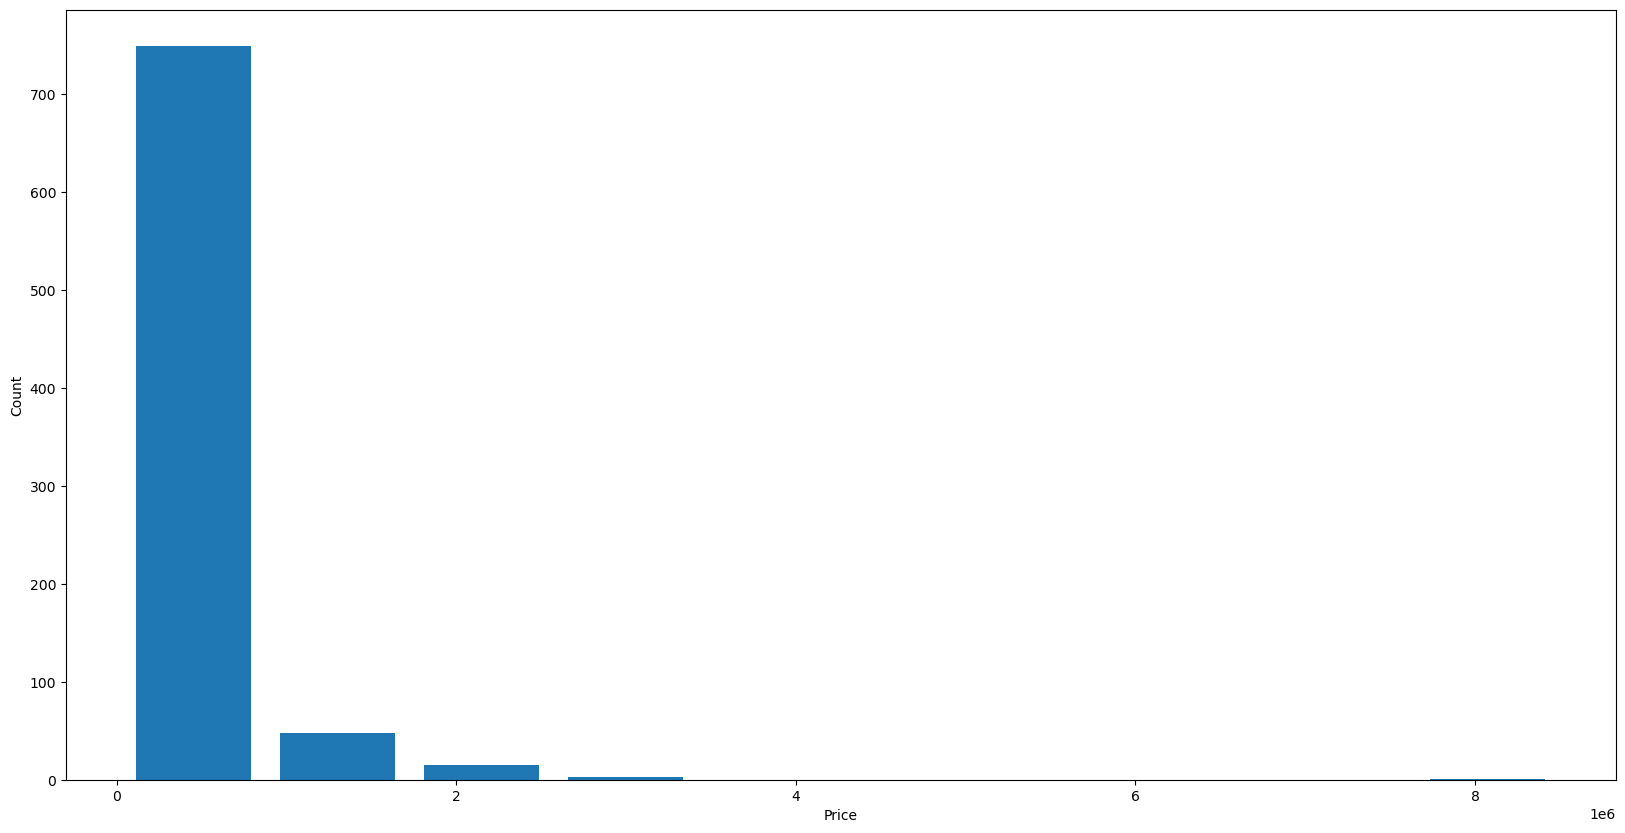

In [28]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.Price,rwidth=0.8)
plt.xlabel("Price")
plt.ylabel("Count")

In [29]:
# dummies = pd.get_dummies(df10.location, dtype=int)
# dummies.head()
df4=df4[df4['Price']<6000000]


In [30]:
import seaborn as sns


C:\Users\varkumar\AppData\Local\Temp\ipykernel_22204\557261515.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


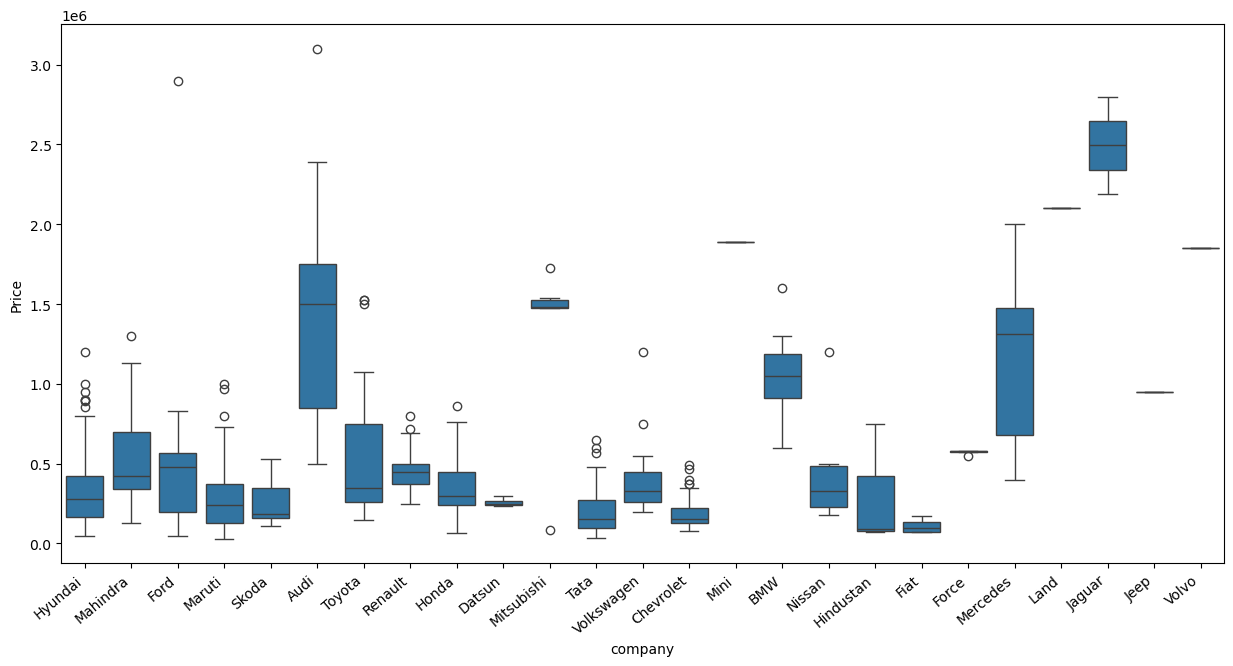

In [31]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df4)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\Users\varkumar\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\varkumar\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\varkumar\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\varkumar\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\varkumar\AppData\Local\anaco

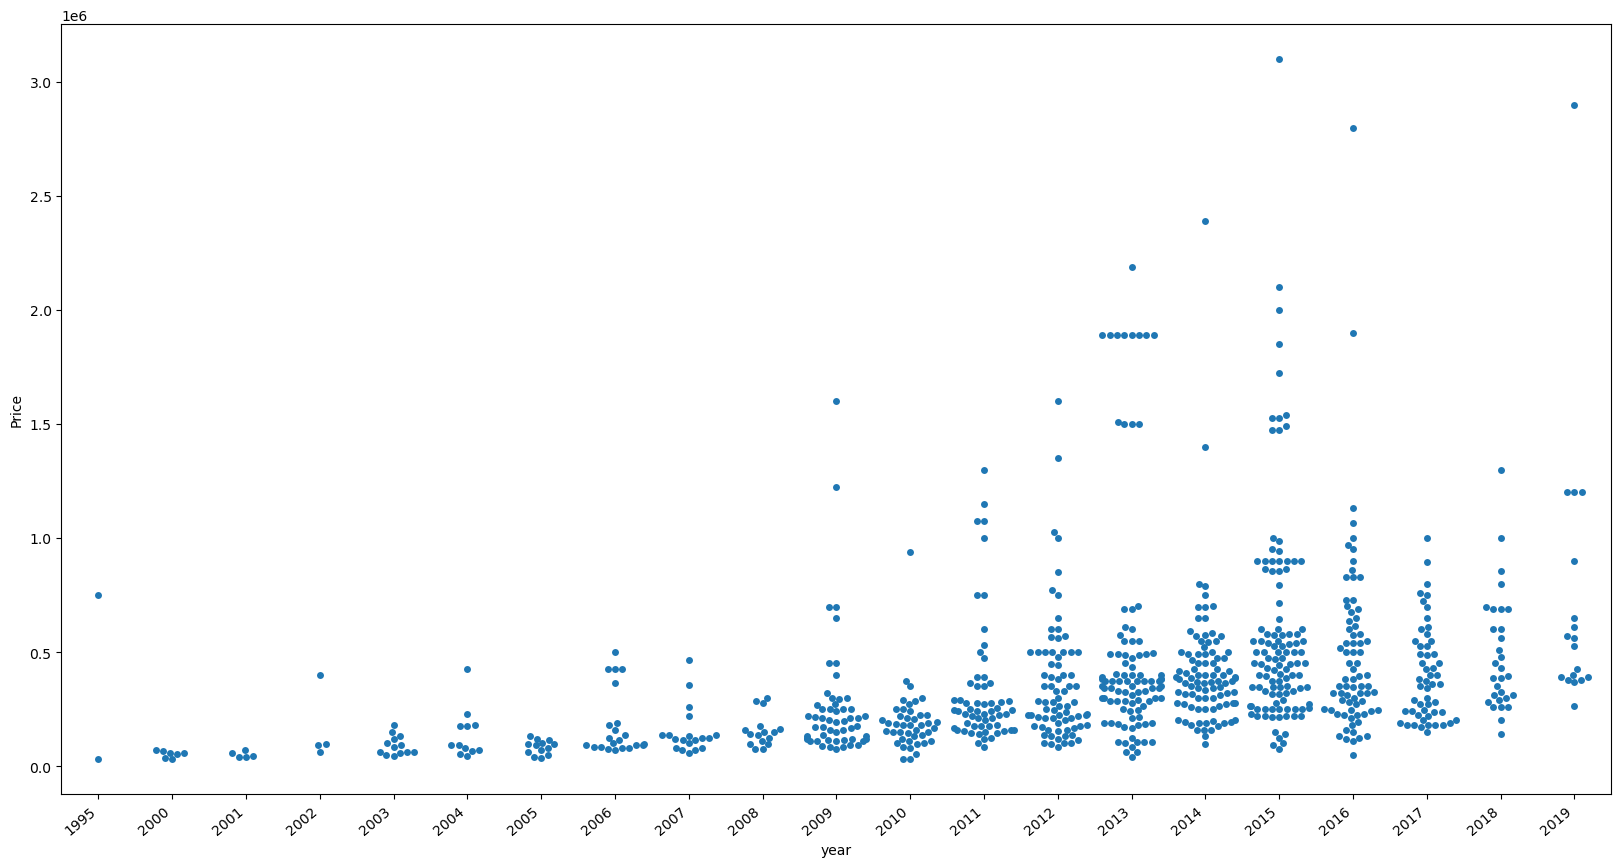

In [32]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=df4)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()


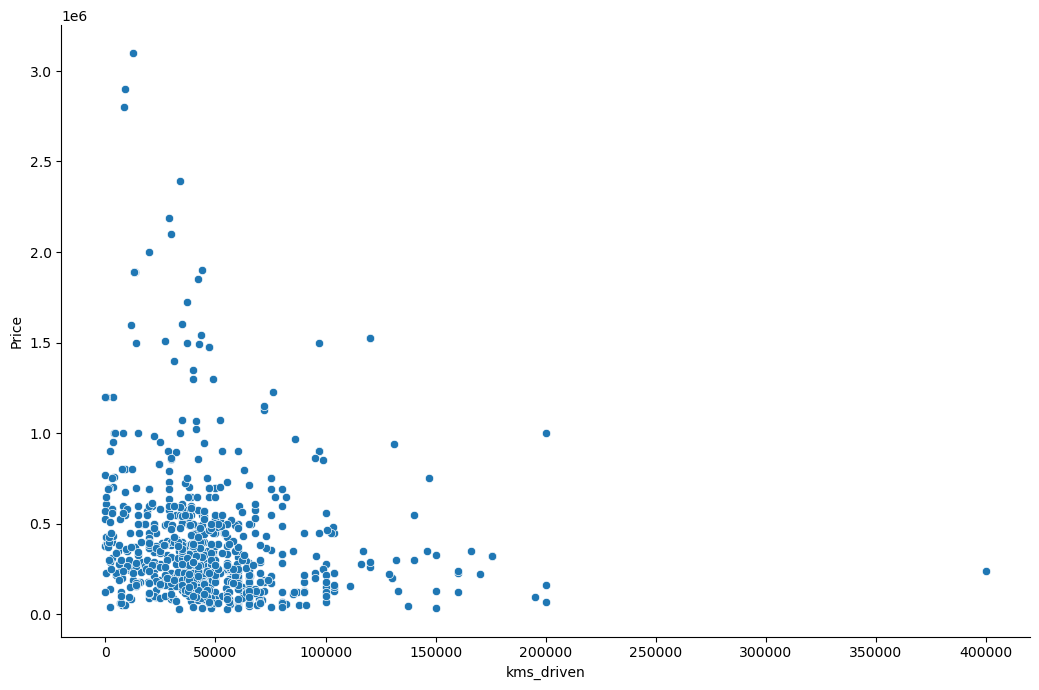

In [33]:
sns.relplot(x='kms_driven',y='Price',data=df4,height=7,aspect=1.5)


In [105]:
df4['name'].unique

<bound method Series.unique of 0         Hyundai Santro Xing
1         Mahindra Jeep CL550
3           Hyundai Grand i10
4      Ford EcoSport Titanium
6                   Ford Figo
                ...          
883        Maruti Suzuki Ritz
885            Tata Indica V2
886      Toyota Corolla Altis
888              Tata Zest XM
889        Mahindra Quanto C8
Name: name, Length: 815, dtype: object>

In [123]:
len(df4['name'].unique())

254

In [34]:
# X=df4[['name','company','year','kms_driven','fuel_type']]
# y=df4['Price']
# pd.get_dummies(data, columns = ['Remarks', 'Gender'])
dummies = pd.get_dummies(df4,columns=['name','company','fuel_type'], dtype=int)
dummies                       


,year,Price,kms_driven,name_Audi A3 Cabriolet,name_Audi A4 1.8,name_Audi A4 2.0,name_Audi A6 2.0,name_Audi A8,name_Audi Q3 2.0,name_Audi Q5 2.0,...,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol
0,2007,80000,45000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,425000,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2014,325000,28000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,575000,36000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,2012,175000,41000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,2011,270000,50000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
885,2009,110000,30000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
886,2009,300000,132000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
888,2018,260000,27000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [35]:
# df5 = pd.concat([df4,dummies.drop(df4,columns=['name','company'],axis='columns')],axis='columns')
df5 = pd.concat([df4,dummies.drop(columns=['name_Audi A3 Cabriolet','company_Mercedes','fuel_type_Diesel'],axis='columns')],axis='columns')
df5=df5.T.drop_duplicates().T
df5.head()


,name,company,year,Price,kms_driven,fuel_type,name_Audi A4 1.8,name_Audi A4 2.0,name_Audi A6 2.0,name_Audi A8,...,company_Maruti,company_Mitsubishi,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,fuel_type_LPG,fuel_type_Petrol
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Ford Figo,Ford,2012,175000,41000,Diesel,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df5.shape

(815, 280)

In [37]:
df6= df5.drop(columns=['name','company','fuel_type'],axis='columns')
df6.head(10)

,year,Price,kms_driven,name_Audi A4 1.8,name_Audi A4 2.0,name_Audi A6 2.0,name_Audi A8,name_Audi Q3 2.0,name_Audi Q5 2.0,name_Audi Q7,...,company_Maruti,company_Mitsubishi,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,fuel_type_LPG,fuel_type_Petrol
0,2007,80000,45000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,425000,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014,325000,28000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,575000,36000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2012,175000,41000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2013,190000,25000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,2016,830000,24530,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2015,250000,60000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
10,2010,182000,60000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
11,2015,315000,30000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [78]:
df6=df6.reset_index(drop=True)
df6.head(10)

,year,Price,kms_driven,name_Audi A4 1.8,name_Audi A4 2.0,name_Audi A6 2.0,name_Audi A8,name_Audi Q3 2.0,name_Audi Q5 2.0,name_Audi Q7,...,company_Maruti,company_Mitsubishi,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,fuel_type_LPG,fuel_type_Petrol
0,2007,80000,45000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,425000,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,325000,28000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2014,575000,36000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012,175000,41000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2013,190000,25000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,2016,830000,24530,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2015,250000,60000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8,2010,182000,60000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9,2015,315000,30000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [80]:

X = df6.drop(['Price'],axis='columns')
X.head(10)

,year,kms_driven,name_Audi A4 1.8,name_Audi A4 2.0,name_Audi A6 2.0,name_Audi A8,name_Audi Q3 2.0,name_Audi Q5 2.0,name_Audi Q7,name_BMW 3 Series,...,company_Maruti,company_Mitsubishi,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,fuel_type_LPG,fuel_type_Petrol
0,2007,45000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,40,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,28000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2014,36000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012,41000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2013,25000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,2016,24530,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2015,60000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8,2010,60000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
9,2015,30000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [93]:
y = df6.Price

In [95]:
y

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
810    270000
811    110000
812    300000
813    260000
814    390000
Name: Price, Length: 815, dtype: object

In [82]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# from sklearn.linear_model import LinearRegression

# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import make_column_transformer
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import r2_score

In [83]:
# ohe=OneHotEncoder()
# ohe.fit(X[['name','company','fuel_type']])


In [84]:
# column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
#                                     remainder='passthrough')

In [85]:
# lr=LinearRegression()


In [86]:
# pipe=make_pipeline(column_trans,lr)


In [87]:
# y_pred=pipe.predict(X_test)


In [88]:
# # #Checking r2 square
# # r2_score(y_test,y_pred)
# # Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score
# scores=[]
# for i in range(1000):
#     X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
#     lr=LinearRegression()
#     pipe=make_pipeline(column_trans,lr)
#     pipe.fit(X_train,y_train)
#     y_pred=pipe.predict(X_test)
#     scores.append(r2_score(y_test,y_pred))

# np.argmax(scores)
# scores[np.argmax(scores)]
# #The best model is found at a certain random state
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
# lr=LinearRegression()
# pipe=make_pipeline(column_trans,lr)
# pipe.fit(X_train,y_train)
# y_pred=pipe.predict(X_test)
# r2_score(y_test,y_pred)


In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [99]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.752809782508643

In [101]:
#Use K Fold cross validation to measure accuracy of our LinearRegression model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 5.41834721e-01,  6.58409246e-01,  4.44014448e-01, -7.09785746e+12,
       -7.67331768e+13])

In [ ]:
# from sklearn.model_selection import GridSearchCV

# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor

# def find_best_model_using_gridsearchcv(X,y):
#     algos = {
#         'linear_regression' : {
#             'model': LinearRegression(),
#             'params': {
#                'copy_X' : [True, False],
#                 'fit_intercept' : [True, False],
#                  'n_jobs' : [1,2,3],
#                  'positive' : [True, False]
#             }
#         },
#          'lasso': {
#              'model': Lasso(),
#              'params': {
#                  'alpha': [1,2],
#                  'selection': ['random', 'cyclic']
#              }
#         }
#         # 'decision_tree': {
#         #     'model': DecisionTreeRegressor(),
#         #     'params': {
#         #         'criterion' : ['mse','friedman_mse'],
#         #         'splitter': ['best','random']
#         #     }
#         #}
#     }
#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         gs =  GridSearchCV(config['model'], config['params'], cv=cv,error_score='raise', return_train_score=False)
#         gs.fit(X,y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })

#     return pd.DataFrame(scores,columns=['model','best_score','best_params'])

# find_best_model_using_gridsearchcv(X,y)